# Math700 Final Project
### Author: Tianhao Gu, Shiyun Zhou

In [1]:
#pip install ta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data, wb
from ta import add_all_ta_features
from sklearn.metrics import mean_squared_error
import datetime
import quandl
import seaborn as sns

C:\Users\shiyu\anaconda\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
pd.set_option("display.max_rows", 15)
pd.set_option("display.max_columns", 15)

<font color='blue'> Load all ticker labels, and choose 01/01/2010 - 12/31/2020 as date range

In [3]:
techTickers = ['MSFT', 'AAPL', 'AMZN', 'V', 'ORCL']
finTickers = ['JPM', 'BAC', 'WFC', 'C', 'MS']
otherTickers = ['JNJ', 'WMT', 'UNH', 'DIS', 'NFLX']
allTickers = ['MSFT', 'AAPL', 'AMZN', 'V', 'ORCL', 'JPM', 'BAC', 'WFC', 'C', 'MS', 'JNJ', 'WMT', 'UNH', 'DIS', 'NFLX']
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2020, 12, 31)

<font color='blue'> For each stock, calculate daily returns

In [4]:
firmReturns = pd.DataFrame()
for ticker in allTickers:
    ticker_data = data.DataReader(ticker, 'yahoo', start, end)
    ticker_return = ticker_data['Adj Close'].pct_change()
    firmReturns = pd.concat([firmReturns, ticker_return], axis=1)
firmReturns.columns = allTickers

In [5]:
firmReturns = firmReturns.dropna()
firmReturns

,MSFT,AAPL,AMZN,V,ORCL,JPM,BAC,WFC,C,MS,JNJ,WMT,UNH,DIS,NFLX
2010-01-04,0.015420,0.015565,-0.004609,0.007775,0.013045,0.029553,0.041832,0.012227,0.027190,0.044257,0.004192,0.014593,0.034449,-0.005581,-0.029225
2010-01-05,0.000323,0.001729,0.005900,-0.011459,-0.001207,0.019370,0.032505,0.027452,0.038235,0.036558,-0.011595,-0.009958,-0.001586,-0.002495,-0.036836
2010-01-06,-0.006137,-0.015906,-0.018116,-0.013428,-0.014505,0.005495,0.011728,0.001425,0.031162,0.012796,0.008133,-0.002235,0.009847,-0.005314,0.035139
2010-01-07,-0.010400,-0.001849,-0.017013,0.009306,-0.003271,0.019808,0.032947,0.036286,0.002748,0.014484,-0.007137,0.000560,0.038377,0.000314,-0.017254
2010-01-08,0.006897,0.006648,0.027077,0.002766,0.012306,-0.002456,-0.008860,-0.009269,-0.016439,-0.020352,0.003438,-0.005037,-0.009391,0.001570,0.017176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,0.007827,0.007712,-0.003949,0.016561,-0.005207,-0.004398,-0.002995,-0.016804,-0.003455,-0.001759,0.003488,0.001955,0.009479,0.001037,-0.000991
2020-12-28,0.009921,0.035766,0.035071,0.018831,-0.001385,0.006585,0.005674,0.003016,0.009246,-0.000587,0.004722,0.011986,0.015141,0.029529,0.010020
2020-12-29,-0.003601,-0.013315,0.011584,0.008183,-0.006320,-0.002633,-0.003983,-0.005012,-0.003599,-0.004996,0.006201,-0.006335,0.004047,-0.008722,0.022634
2020-12-30,-0.011019,-0.008527,-0.010882,0.018613,-0.000931,0.002800,-0.001000,-0.001007,-0.000821,0.001920,0.012391,-0.000832,-0.006794,0.021827,-0.011830


<font color='blue'>Calculate and sort standard deviation of the daily price return of all stocks

In [6]:
returnStd = firmReturns.std(axis=0)
returnStd = returnStd.sort_values()
returnStd

JNJ     0.010696
WMT     0.011966
DIS     0.015699
ORCL    0.015969
MSFT    0.015993
V       0.016231
UNH     0.016483
AAPL    0.017829
JPM     0.018259
WFC     0.018552
AMZN    0.019990
BAC     0.022482
C       0.022586
MS      0.022637
NFLX    0.032482
dtype: float64

<font color='blue'> Choose 3 stocks among 2020, standard for choosing is described in the report

In [7]:
finalReturns = firmReturns[['AAPL', 'MS', 'WMT']]
aapl = data.DataReader('AAPL', 'yahoo', start, end)
ms = data.DataReader('MS', 'yahoo', start, end)
wmt = data.DataReader('WMT', 'yahoo', start, end)
finalReturns

,AAPL,MS,WMT
2010-01-04,0.015565,0.044257,0.014593
2010-01-05,0.001729,0.036558,-0.009958
2010-01-06,-0.015906,0.012796,-0.002235
2010-01-07,-0.001849,0.014484,0.000560
2010-01-08,0.006648,-0.020352,-0.005037
...,...,...,...
2020-12-24,0.007712,-0.001759,0.001955
2020-12-28,0.035766,-0.000587,0.011986
2020-12-29,-0.013315,-0.004996,-0.006335
2020-12-30,-0.008527,0.001920,-0.000832


<font color='blue'> Load the technical indicators package

In [8]:
aaplTable = add_all_ta_features(aapl, open="Open", high="High", low="Low", close="Close", volume="Volume")
msTable = add_all_ta_features(ms, open="Open", high="High", low="Low", close="Close", volume="Volume")
wmtTable = add_all_ta_features(wmt, open="Open", high="High", low="Low", close="Close", volume="Volume")

C:\Users\shiyu\anaconda\lib\site-packages\ta\trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
C:\Users\shiyu\anaconda\lib\site-packages\ta\trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


<font color='blue'> Choose 9 features as predictors, detail in report

In [9]:
aaplTable = aaplTable[['momentum_rsi', 'momentum_stoch', 'momentum_ao', 'volatility_bbm', 'volatility_atr', 'volume_mfi',
                        'trend_adx', 'trend_macd', 'trend_aroon_up']]
aaplTable = aaplTable.drop(aaplTable.index[0])
msTable = msTable[['momentum_rsi', 'momentum_stoch', 'momentum_ao', 'volatility_bbm', 'volatility_atr', 'volume_mfi',
                        'trend_adx', 'trend_macd', 'trend_aroon_up']]
msTable = msTable.drop(msTable.index[0])
wmtTable = wmtTable[['momentum_rsi', 'momentum_stoch', 'momentum_ao', 'volatility_bbm', 'volatility_atr', 'volume_mfi',
                        'trend_adx', 'trend_macd', 'trend_aroon_up']]
wmtTable = wmtTable.drop(wmtTable.index[0])
aaplTable

,momentum_rsi,momentum_stoch,momentum_ao,volatility_bbm,volatility_atr,volume_mfi,trend_adx,trend_macd,trend_aroon_up
Date,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN
2010-01-08,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-12-24,67.866386,82.889186,8.041295,124.903000,3.151081,54.877754,20.490431,3.323474,100.0
2020-12-28,73.597952,96.218766,9.081940,125.908001,3.372972,56.296837,22.103938,3.794496,100.0
2020-12-29,68.522632,78.969958,10.702911,126.699000,3.480675,57.640643,23.837381,3.975103,96.0


<font color='blue'> Append the features to the daily return of each stock

In [10]:
aaplTable = pd.concat([aaplTable, finalReturns['AAPL']], axis=1)
msTable = pd.concat([msTable, finalReturns['MS']], axis=1)
wmtTable = pd.concat([wmtTable, finalReturns['WMT']], axis=1)
aaplTable

,momentum_rsi,momentum_stoch,momentum_ao,volatility_bbm,volatility_atr,volume_mfi,trend_adx,trend_macd,trend_aroon_up,AAPL
2010-01-04,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,0.015565
2010-01-05,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,0.001729
2010-01-06,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,-0.015906
2010-01-07,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,-0.001849
2010-01-08,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,0.006648
...,...,...,...,...,...,...,...,...,...,...
2020-12-24,67.866386,82.889186,8.041295,124.903000,3.151081,54.877754,20.490431,3.323474,100.0,0.007712
2020-12-28,73.597952,96.218766,9.081940,125.908001,3.372972,56.296837,22.103938,3.794496,100.0,0.035766
2020-12-29,68.522632,78.969958,10.702911,126.699000,3.480675,57.640643,23.837381,3.975103,96.0,-0.013315
2020-12-30,65.451324,72.800460,10.681940,127.249000,3.391608,57.978528,25.041166,3.979567,92.0,-0.008527


<font color='blue'> Drop the Nan values by removing the first 30+ rows in the tables, as some indicators requires range to calculate

In [11]:
aaplTable = aaplTable.drop(aaplTable.index[0:32])
msTable = msTable.drop(msTable.index[0:32])
wmtTable = wmtTable.drop(wmtTable.index[0:32])
aaplTable = aaplTable.iloc[0:2738:5]
msTable = msTable.iloc[0:2738:5]
wmtTable = wmtTable.iloc[0:2738:5]
aaplTable

,momentum_rsi,momentum_stoch,momentum_ao,volatility_bbm,volatility_atr,volume_mfi,trend_adx,trend_macd,trend_aroon_up,AAPL
2010-02-19,49.833484,80.386299,-0.083318,7.104196,0.168326,66.701015,21.748195,-0.048706,12.0,-0.006209
2010-02-26,54.592651,95.076104,-0.061206,7.087821,0.164964,69.201537,18.914213,-0.020257,16.0,0.012970
2010-03-05,70.251384,96.873682,0.290634,7.235857,0.161941,69.968520,20.331058,0.089844,100.0,0.039106
2010-03-12,76.202842,96.470998,0.669584,7.484929,0.140535,88.343465,30.210545,0.215207,100.0,0.004878
2010-03-19,64.257623,72.586320,0.577012,7.678464,0.135498,75.667322,29.909905,0.205644,80.0,-0.010683
...,...,...,...,...,...,...,...,...,...,...
2020-12-01,61.361366,93.106621,0.710059,117.523500,3.108872,54.336604,13.436980,0.765601,100.0,0.030827
2020-12-08,63.487923,95.157338,5.592736,119.372000,2.625745,58.952414,16.171911,1.886484,100.0,0.005091
2020-12-15,65.877870,99.842857,4.711766,120.514999,3.139223,73.262278,15.716721,2.032415,100.0,0.050090
2020-12-22,69.050689,82.258076,7.450764,123.316500,3.398248,56.037032,18.758502,2.995821,100.0,0.028465


<font color='blue'> Scale the data using StandardScaler()

In [12]:
from sklearn.preprocessing import StandardScaler

aaplFeas = aaplTable.iloc[:, 0:9]
for col in aaplFeas.columns:
    scaler = StandardScaler()
    scaler.fit(aaplFeas[[col]])
    aaplTable[col] = scaler.transform(aaplFeas[[col]])

msFeas = msTable.iloc[:, 0:9]
for col in msFeas.columns:
    scaler = StandardScaler()
    scaler.fit(msFeas[[col]])
    msTable[col] = scaler.transform(msFeas[[col]])

wmtFeas = wmtTable.iloc[:, 0:9]
for col in wmtFeas.columns:
    scaler = StandardScaler()
    scaler.fit(wmtFeas[[col]])
    wmtTable[col] = scaler.transform(wmtFeas[[col]])
wmtTable

,momentum_rsi,momentum_stoch,momentum_ao,volatility_bbm,volatility_atr,volume_mfi,trend_adx,trend_macd,trend_aroon_up,WMT
2010-02-19,-0.175917,-0.284937,-0.295997,-1.185476,-0.630966,-0.718948,-1.896427,-0.261709,-0.034725,0.000374
2010-02-26,0.242768,1.093377,-0.126260,-1.176216,-0.661447,0.948035,-1.610858,-0.117571,-0.622048,-0.001477
2010-03-05,0.289823,1.186014,-0.105464,-1.172624,-0.760444,0.992934,-1.495746,-0.112120,-1.209371,0.003336
2010-03-12,-0.038560,0.058483,-0.034817,-1.164234,-0.856361,1.199374,-1.557213,-0.128369,-0.034725,-0.001297
2010-03-19,0.695606,0.539636,0.497005,-1.139399,-0.709277,0.417265,-0.549985,0.294428,0.904992,-0.010726
...,...,...,...,...,...,...,...,...,...,...
2020-12-01,0.966788,1.057653,2.013836,3.071315,1.566619,0.657182,1.476290,2.381557,1.139921,-0.000982
2020-12-08,0.074400,-0.609661,0.668462,3.135510,1.464639,-0.497883,0.541874,1.141283,0.552598,0.009047
2020-12-15,-0.869369,-1.498841,-0.377532,3.110497,1.154083,-1.353732,-0.132861,-0.180445,-0.034725,-0.000481
2020-12-22,-1.202863,-1.279772,-1.221564,3.056722,1.073819,-1.185804,-0.602740,-0.849580,-0.622048,-0.012126


<font color='blue'> Define the plot function which contains comparison plot, MSE calculation, and feature importance calculation

In [43]:
x0 = list(range(51, 549))
myindex = ['momentum_rsi', 'momentum_stoch', 'momentum_ao', 'volatility_bbm', 'volatility_atr', 'volume_mfi',
           'trend_adx', 'trend_macd', 'trend_aroon_up']
def plotDiff(test_data, pred_data, feature_data, label):
    sns.set()
    plt.figure(figsize=(15,8))
    plt.plot(x0, test_data, label='test_data')
    plt.plot(x0, pred_data, label='pred_data')
    plt.legend(prop={'size': 15})
    plt.xlabel('Time periods')
    plt.ylabel('weekly return')
    titlestr = "Test Data versus Predicted Data of " + label + " over the period"
    plt.title(titlestr)
    plt.show()
    msq = mean_squared_error(test_data, pred_data)
    msqstr = "Mean Squared Error of " + label
    print(msqstr, msq)
    feature_data.index = myindex
    print("Feature Importance: ")
    all_sum = feature_data.sum().sum()
    print((feature_data.sum(axis=1) / all_sum).sort_values(ascending=False))
    
def plotDifff(test_data, pred_data, label):
    sns.set()
    plt.figure(figsize=(15,8))
    plt.plot(x0, test_data, label='test_data')
    plt.plot(x0, pred_data, label='pred_data')
    plt.legend(prop={'size': 15})
    plt.xlabel('Time periods')
    plt.ylabel('weekly return')
    titlestr = "Test Data versus Predicted Data of " + label + " over the period"
    plt.title(titlestr)
    plt.show()
    msq = mean_squared_error(test_data, pred_data)
    msqstr = "Mean Squared Error of " + label
    print(msqstr, msq)

### Random Forest Model Creation starts ###

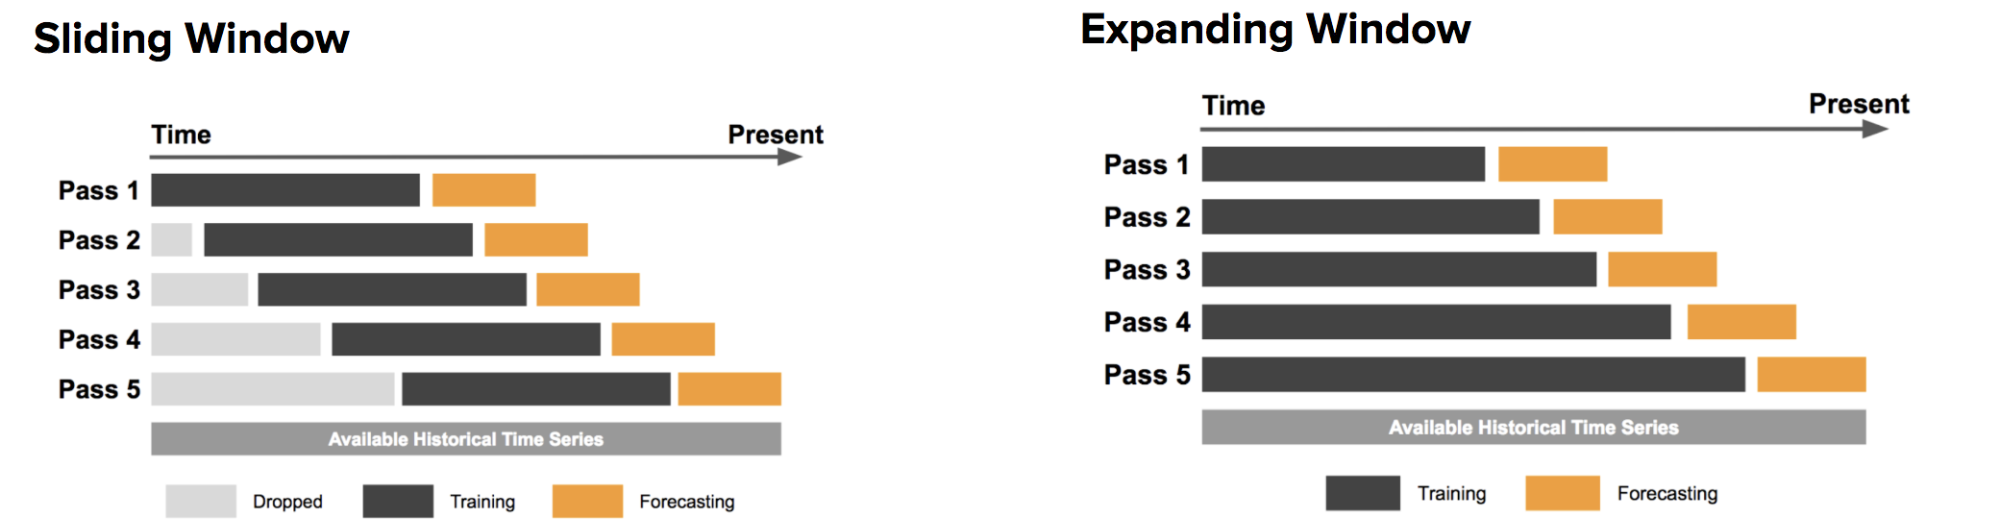

In [1]:
from IPython.display import Image
url = 'http://1fykyq3mdn5r21tpna3wkdyi-wpengine.netdna-ssl.com/wp-content/uploads/2018/09/image6-e1536165830511.png'
Image(url,width=1000, height=500)

<font color='blue'> AAPL without improvement

C:\Users\shiyu\anaconda\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if __name__ == '__main__':
C:\Users\shiyu\anaconda\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\shiyu\anaconda\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  # This is added back by InteractiveShellApp.init_path()


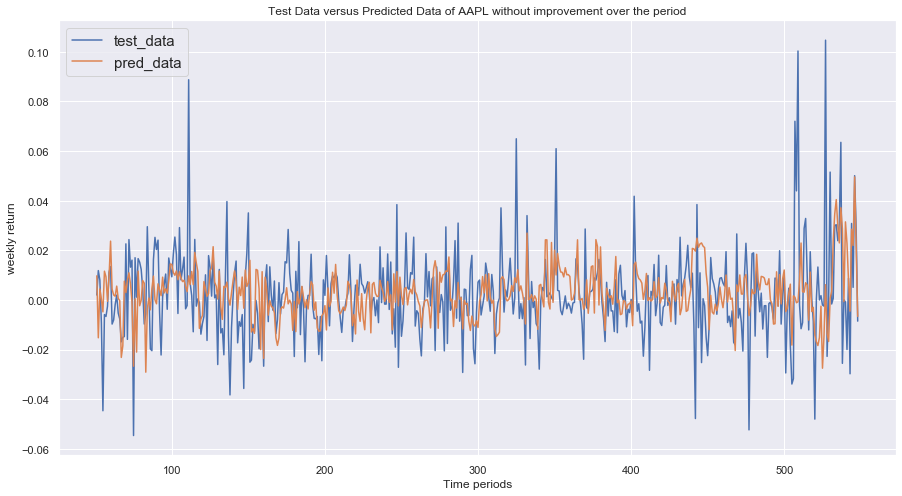

Mean Squared Error of AAPL without improvement 0.0002938695246611931
Feature Importance: 
momentum_stoch    0.261348
volatility_atr    0.149081
momentum_rsi      0.125624
momentum_ao       0.093561
volatility_bbm    0.081404
trend_aroon_up    0.079556
trend_adx         0.077612
volume_mfi        0.071334
trend_macd        0.060481
dtype: float64


In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, mean_squared_error, r2_score

#use slicing windows method, details described in the report
beginIndex = 0
endIndex = 50
slicingSize = 10
aapl_all_test = pd.Series()
aapl_all_pred = pd.Series()
aapl_all_feas = pd.Series()
while endIndex < aaplTable.shape[0]:
    aapl_X_train = aaplTable.iloc[beginIndex:endIndex, 0:9]
    aapl_y_train = aaplTable.iloc[beginIndex:endIndex, 9]
    aapl_X_test = aaplTable.iloc[endIndex:(endIndex+slicingSize), 0:9]
    aapl_y_test = aaplTable.iloc[endIndex:(endIndex+slicingSize), 9]
    rf_model = RandomForestRegressor(criterion='mse')
    rf_model.fit(aapl_X_train, aapl_y_train)
    aaplPredict = rf_model.predict(aapl_X_test)
    aapl_all_test = pd.concat([aapl_all_test, aapl_y_test])
    aapl_all_pred = np.concatenate((aapl_all_pred, pd.Series(aaplPredict)), axis=None)
    aapl_all_feas = pd.concat([aapl_all_feas, pd.Series(rf_model.feature_importances_)], axis=1)
    #r2sqr = r2_score(aapl_y_test, aaplPredict)
    #print("From", beginIndex, "-", endIndex-1, "to predict", endIndex, "-", endIndex+slicingSize-1, ":", r2sqr)
    beginIndex += slicingSize
    endIndex += slicingSize

plotDiff(aapl_all_test, aapl_all_pred, aapl_all_feas, 'AAPL without improvement')

<font color='blue'> MS without improvement

C:\Users\shiyu\anaconda\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.
C:\Users\shiyu\anaconda\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """
C:\Users\shiyu\anaconda\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


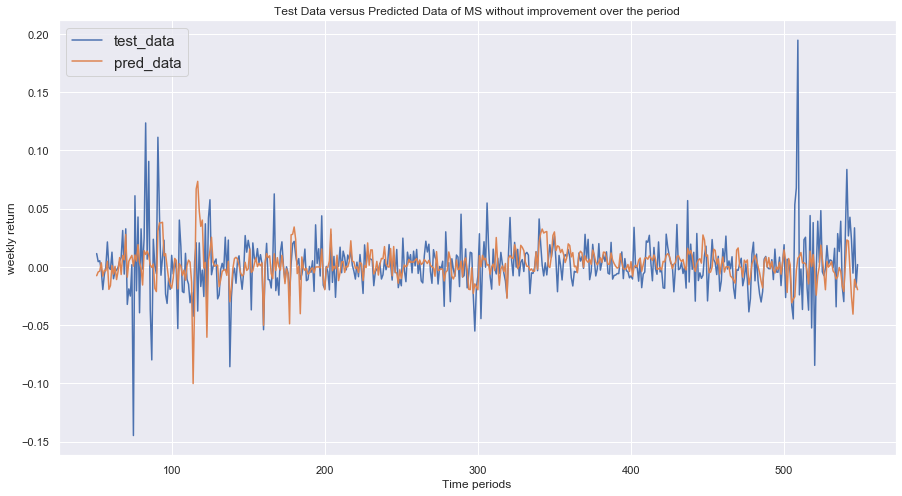

Mean Squared Error of MS without improvement 0.0005620796460816779
Feature Importance: 
momentum_stoch    0.278170
volatility_atr    0.124911
momentum_rsi      0.105120
trend_aroon_up    0.095300
momentum_ao       0.090258
trend_adx         0.089154
volatility_bbm    0.081390
trend_macd        0.070205
volume_mfi        0.065492
dtype: float64


In [15]:
beginIndex = 0
endIndex = 50
slicingSize = 10
ms_all_test = pd.Series()
ms_all_pred = pd.Series()
ms_all_feas = pd.Series()
while endIndex < msTable.shape[0]:
    ms_X_train = msTable.iloc[beginIndex:endIndex, 0:9]
    ms_y_train = msTable.iloc[beginIndex:endIndex, 9]
    ms_X_test = msTable.iloc[endIndex:(endIndex+slicingSize), 0:9]
    ms_y_test = msTable.iloc[endIndex:(endIndex+slicingSize), 9]
    rf_model = RandomForestRegressor(criterion='mse')
    rf_model.fit(ms_X_train, ms_y_train)
    msPredict = rf_model.predict(ms_X_test)
    ms_all_test = pd.concat([ms_all_test, ms_y_test])
    ms_all_pred = np.concatenate((ms_all_pred, pd.Series(msPredict)), axis=None)
    ms_all_feas = pd.concat([ms_all_feas, pd.Series(rf_model.feature_importances_)], axis=1)
    #r2sqr = r2_score(ms_y_test, msPredict)
    #print("From", beginIndex, "-", endIndex-1, "to predict", endIndex, "-", endIndex+slicingSize-1, ":", r2sqr)
    beginIndex += slicingSize
    endIndex += slicingSize
    
plotDiff(ms_all_test, ms_all_pred, ms_all_feas, 'MS without improvement')

<font color='blue'> WMT without improvement

C:\Users\shiyu\anaconda\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.
C:\Users\shiyu\anaconda\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """
C:\Users\shiyu\anaconda\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


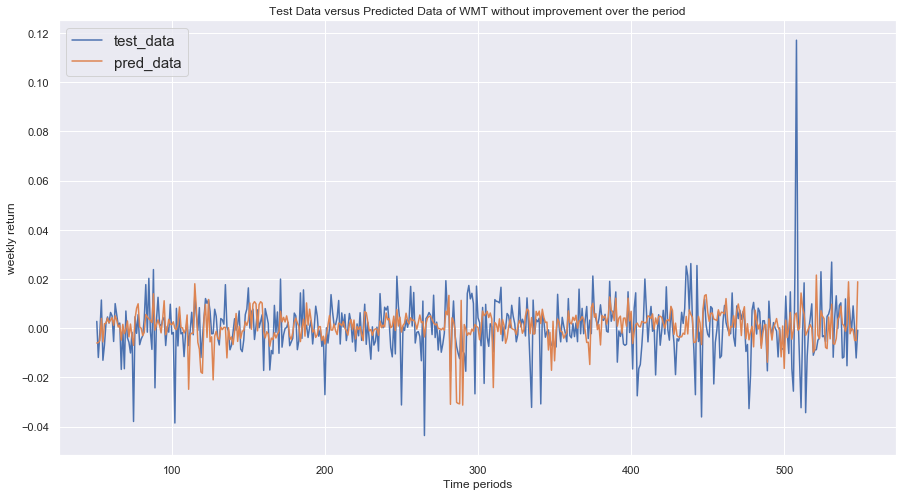

Mean Squared Error of WMT without improvement 0.00012983525231201332
Feature Importance: 
momentum_stoch    0.287135
volatility_atr    0.141350
momentum_rsi      0.116054
volume_mfi        0.092693
momentum_ao       0.088202
volatility_bbm    0.077417
trend_aroon_up    0.075019
trend_adx         0.071912
trend_macd        0.050219
dtype: float64


In [61]:
beginIndex = 0
endIndex = 50
slicingSize = 10
wmt_all_test = pd.Series()
wmt_all_pred = pd.Series()
wmt_all_feas = pd.Series()
while endIndex < wmtTable.shape[0]:
    wmt_X_train = wmtTable.iloc[beginIndex:endIndex, 0:9]
    wmt_y_train = wmtTable.iloc[beginIndex:endIndex, 9]
    wmt_X_test = wmtTable.iloc[endIndex:(endIndex+slicingSize), 0:9]
    wmt_y_test = wmtTable.iloc[endIndex:(endIndex+slicingSize), 9]
    rf_model = RandomForestRegressor(n_estimators=100, criterion='mse', max_depth=30)
    rf_fit = rf_model.fit(wmt_X_train, wmt_y_train)
    wmtPredict = rf_model.predict(wmt_X_test)
    wmt_all_test = pd.concat([wmt_all_test, wmt_y_test])
    wmt_all_pred = np.concatenate((wmt_all_pred, pd.Series(wmtPredict)), axis=None)
    wmt_all_feas = pd.concat([wmt_all_feas, pd.Series(rf_model.feature_importances_)], axis=1)
    #r2sqr = r2_score(wmt_y_test, wmtPredict)
    #print("From", beginIndex, "-", endIndex-1, "to predict", endIndex, "-", endIndex+slicingSize-1, ":", r2sqr)
    beginIndex += slicingSize
    endIndex += slicingSize
msq = mean_squared_error(wmt_all_test, wmt_all_pred)    
plotDiff(wmt_all_test, wmt_all_pred, wmt_all_feas, 'WMT without improvement')

<font color='blue'> Parameters for tuning, which will be used in GridSearchCV for model improvement

In [85]:
param_grid1 = {'n_estimators': [10, 20, 30, 50, 100], 'max_depth': [5, 10, 20], 
               'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 5, 10], 
               'max_features': ['auto', 'sqrt', 'log2']}

<font color='blue'> AAPL with improvement

In [90]:
beginIndex = 0
endIndex = 50
slicingSize = 10
aapl_improved_all_test = pd.Series()
aapl_improved_all_pred = pd.Series()
while endIndex < aaplTable.shape[0]:
    aapl_X_train = aaplTable.iloc[beginIndex:endIndex, 0:9]
    aapl_y_train = aaplTable.iloc[beginIndex:endIndex, 9]
    aapl_X_test = aaplTable.iloc[endIndex:(endIndex+slicingSize), 0:9]
    aapl_y_test = aaplTable.iloc[endIndex:(endIndex+slicingSize), 9]
    rf_model = RandomForestRegressor(criterion='mse')
    rf_model.fit(aapl_X_train, aapl_y_train)
    grid_clf = GridSearchCV(rf_model, param_grid1)
    grid_clf.fit(aapl_X_train, aapl_y_train)
    aaplPredict = grid_clf.predict(aapl_X_test)
    aapl_improved_all_test = pd.concat([aapl_improved_all_test, aapl_y_test])
    aapl_improved_all_pred = np.concatenate((aapl_improved_all_pred, pd.Series(aaplPredict)), axis=None)
    beginIndex += slicingSize
    endIndex += slicingSize

C:\Users\shiyu\anaconda\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.
C:\Users\shiyu\anaconda\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """


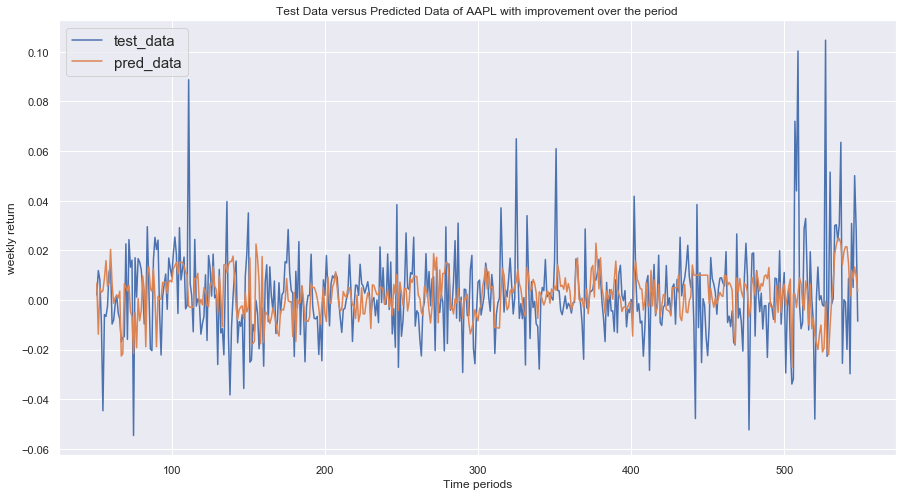

Mean Squared Error of AAPL with improvement 0.0003133955909873086


In [91]:
plotDifff(aapl_improved_all_test, aapl_improved_all_pred,'AAPL with improvement')

<font color='blue'> MS with improvement

In [ ]:
beginIndex = 0
endIndex = 50
slicingSize = 10
ms_improved_all_test = pd.Series()
ms_improved_all_pred = pd.Series()
while endIndex < msTable.shape[0]:
    ms_X_train = msTable.iloc[beginIndex:endIndex, 0:9]
    ms_y_train = msTable.iloc[beginIndex:endIndex, 9]
    ms_X_test = msTable.iloc[endIndex:(endIndex+slicingSize), 0:9]
    ms_y_test = msTable.iloc[endIndex:(endIndex+slicingSize), 9]
    rf_model = RandomForestRegressor(criterion='mse')
    rf_model.fit(ms_X_train, ms_y_train)
    grid_clf = GridSearchCV(rf_model, param_grid1)
    grid_clf.fit(ms_X_train, ms_y_train)
    msPredict = grid_clf.predict(ms_X_test)
    ms_improved_all_test = pd.concat([ms_improved_all_test, ms_y_test])
    ms_improved_all_pred = np.concatenate((ms_improved_all_pred, pd.Series(msPredict)), axis=None)
    beginIndex += slicingSize
    endIndex += slicingSize
    
plotDifff(ms_improved_all_test, ms_improved_all_pred, 'MS with improvement')

<font color='blue'> WMT with improvement

In [ ]:
beginIndex = 0
endIndex = 50
slicingSize = 10
wmt_improved_all_test = pd.Series()
wmt_improved_all_pred = pd.Series()
while endIndex < wmtTable.shape[0]:
    wmt_X_train = wmtTable.iloc[beginIndex:endIndex, 0:9]
    wmt_y_train = wmtTable.iloc[beginIndex:endIndex, 9]
    wmt_X_test = wmtTable.iloc[endIndex:(endIndex+slicingSize), 0:9]
    wmt_y_test = wmtTable.iloc[endIndex:(endIndex+slicingSize), 9]
    rf_model = RandomForestRegressor(n_estimators=100, criterion='mse', max_depth=30)
    rf_fit = rf_model.fit(wmt_X_train, wmt_y_train)
    grid_clf = GridSearchCV(rf_model, param_grid1)
    grid_clf.fit(wmt_X_train, wmt_y_train)
    wmtPredict = grid_clf.predict(wmt_X_test)
    wmt_improved_all_test = pd.concat([wmt_improved_all_test, wmt_y_test])
    wmt_improved_all_pred = np.concatenate((wmt_improved_all_pred, pd.Series(wmtPredict)), axis=None)
    beginIndex += slicingSize
    endIndex += slicingSize
msq_improve = mean_squared_error(test_data, pred_data)    
plotDifff(wmt_improved_all_test, wmt_improved_all_pred, 'WMT with improvement')

C:\Users\shiyu\anaconda\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.
C:\Users\shiyu\anaconda\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """


<font color='blue'> Predict WMT with other models, prepare for the comparison

<font color='blue'> Predict WMT using basic regression model

C:\Users\shiyu\anaconda\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
C:\Users\shiyu\anaconda\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  import sys
C:\Users\shiyu\anaconda\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


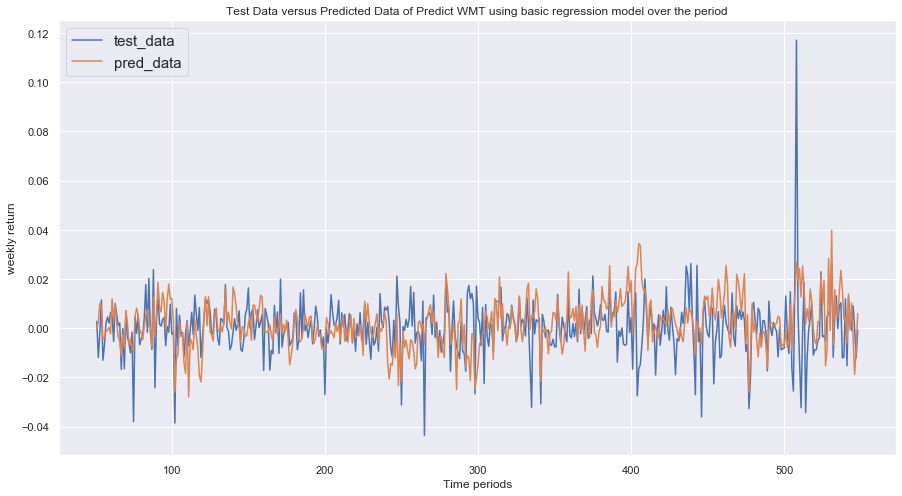

Mean Squared Error of Predict WMT using basic regression model 0.00015223811939934888


In [60]:
#basic regression model
from sklearn.linear_model import LinearRegression 
beginIndex = 0
endIndex = 50
slicingSize = 10
wmt_all_test = pd.Series()
wmt_all_pred = pd.Series()
wmt_all_feas = pd.Series()
while endIndex < wmtTable.shape[0]:
    wmt_X_train = wmtTable.iloc[beginIndex:endIndex, 0:9]
    wmt_y_train = wmtTable.iloc[beginIndex:endIndex, 9]
    wmt_X_test = wmtTable.iloc[endIndex:(endIndex+slicingSize), 0:9]
    wmt_y_test = wmtTable.iloc[endIndex:(endIndex+slicingSize), 9]
    rf_model = LinearRegression()
    rf_fit = rf_model.fit(wmt_X_train, wmt_y_train)
    wmtPredict = rf_model.predict(wmt_X_test)
    wmt_all_test = pd.concat([wmt_all_test, wmt_y_test])
    wmt_all_pred = np.concatenate((wmt_all_pred, pd.Series(wmtPredict)), axis=None)
    #r2sqr = r2_score(wmt_y_test, wmtPredict)
    #print("From", beginIndex, "-", endIndex-1, "to predict", endIndex, "-", endIndex+slicingSize-1, ":", r2sqr)
    beginIndex += slicingSize
    endIndex += slicingSize
msq_r = mean_squared_error(wmt_all_test, wmt_all_pred)    
plotDifff(wmt_all_test, wmt_all_pred, 'Predict WMT using basic regression model')

<font color='blue'> Predict WMT using generalized linear model with group lasso (GLM)

C:\Users\shiyu\anaconda\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
C:\Users\shiyu\anaconda\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  import sys
C:\Users\shiyu\anaconda\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


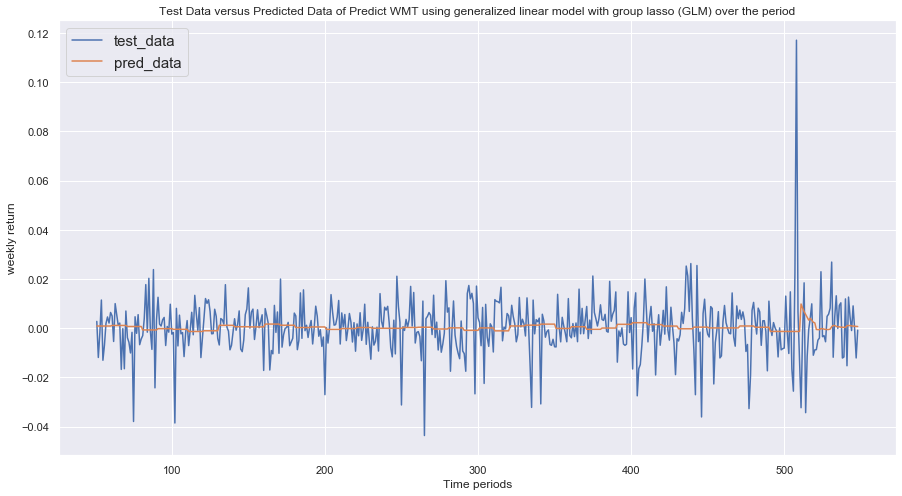

Mean Squared Error of Predict WMT using generalized linear model with group lasso (GLM) 0.00013880995387040038


In [57]:
#generalized linear model with group lasso (GLM)
from sklearn.linear_model import Lasso
beginIndex = 0
endIndex = 50
slicingSize = 10
wmt_all_test = pd.Series()
wmt_all_pred = pd.Series()
wmt_all_feas = pd.Series()
while endIndex < wmtTable.shape[0]:
    wmt_X_train = wmtTable.iloc[beginIndex:endIndex, 0:9]
    wmt_y_train = wmtTable.iloc[beginIndex:endIndex, 9]
    wmt_X_test = wmtTable.iloc[endIndex:(endIndex+slicingSize), 0:9]
    wmt_y_test = wmtTable.iloc[endIndex:(endIndex+slicingSize), 9]
    rf_model = Lasso(alpha=0.01, max_iter=10e5)
    rf_fit = rf_model.fit(wmt_X_train, wmt_y_train)
    wmtPredict = rf_model.predict(wmt_X_test)
    wmt_all_test = pd.concat([wmt_all_test, wmt_y_test])
    wmt_all_pred = np.concatenate((wmt_all_pred, pd.Series(wmtPredict)), axis=None)
    #r2sqr = r2_score(wmt_y_test, wmtPredict)
    #print("From", beginIndex, "-", endIndex-1, "to predict", endIndex, "-", endIndex+slicingSize-1, ":", r2sqr)
    beginIndex += slicingSize
    endIndex += slicingSize
msq_GLM = mean_squared_error(wmt_all_test, wmt_all_pred)    
plotDifff(wmt_all_test, wmt_all_pred, 'Predict WMT using generalized linear model with group lasso (GLM)')

<font color='blue'> Predict WMT using GradientBoostingRegressor

C:\Users\shiyu\anaconda\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """
C:\Users\shiyu\anaconda\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
C:\Users\shiyu\anaconda\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  import sys


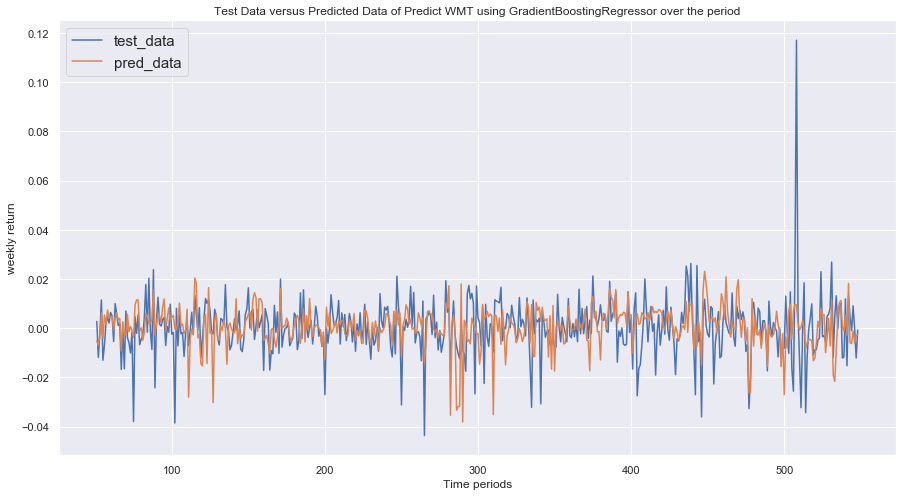

Mean Squared Error of Predict WMT using GradientBoostingRegressor 0.00013598670628261293


In [58]:
from sklearn.ensemble import GradientBoostingRegressor
beginIndex = 0
endIndex = 50
slicingSize = 10
wmt_all_test = pd.Series()
wmt_all_pred = pd.Series()
wmt_all_feas = pd.Series()
while endIndex < wmtTable.shape[0]:
    wmt_X_train = wmtTable.iloc[beginIndex:endIndex, 0:9]
    wmt_y_train = wmtTable.iloc[beginIndex:endIndex, 9]
    wmt_X_test = wmtTable.iloc[endIndex:(endIndex+slicingSize), 0:9]
    wmt_y_test = wmtTable.iloc[endIndex:(endIndex+slicingSize), 9]
    rf_model = GradientBoostingRegressor(max_depth=4, 
            n_estimators=200,
            random_state=2)
    rf_fit = rf_model.fit(wmt_X_train, wmt_y_train)
    wmtPredict = rf_model.predict(wmt_X_test)
    wmt_all_test = pd.concat([wmt_all_test, wmt_y_test])
    wmt_all_pred = np.concatenate((wmt_all_pred, pd.Series(wmtPredict)), axis=None)
    #r2sqr = r2_score(wmt_y_test, wmtPredict)
    #print("From", beginIndex, "-", endIndex-1, "to predict", endIndex, "-", endIndex+slicingSize-1, ":", r2sqr)
    beginIndex += slicingSize
    endIndex += slicingSize
msq_GBR = mean_squared_error(wmt_all_test, wmt_all_pred)  
plotDifff(wmt_all_test, wmt_all_pred, 'Predict WMT using GradientBoostingRegressor')

<font color='blue'> Predict WMT using NN2

C:\Users\shiyu\anaconda\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """
C:\Users\shiyu\anaconda\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
C:\Users\shiyu\anaconda\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  import sys


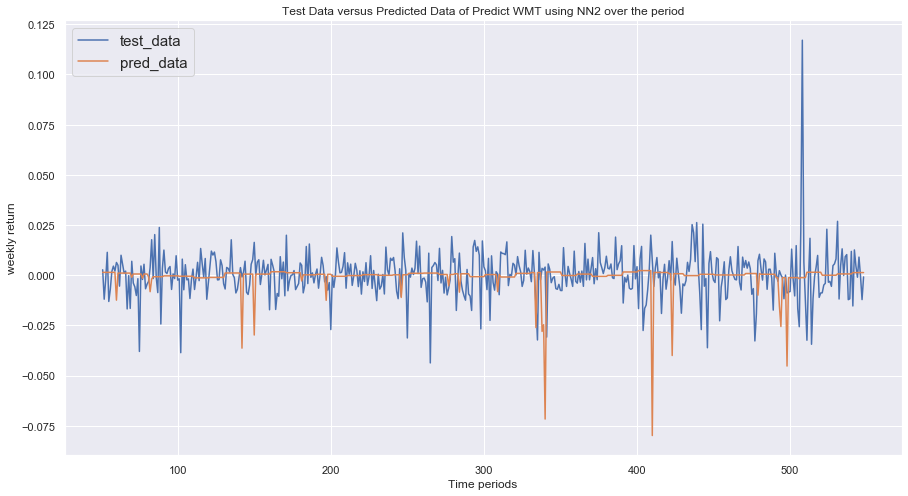

Mean Squared Error of Predict WMT using NN2 0.00018559941832951894


In [59]:
from sklearn.neural_network import MLPRegressor
beginIndex = 0
endIndex = 50
slicingSize = 10
wmt_all_test = pd.Series()
wmt_all_pred = pd.Series()
wmt_all_feas = pd.Series()
while endIndex < wmtTable.shape[0]:
    wmt_X_train = wmtTable.iloc[beginIndex:endIndex, 0:9]
    wmt_y_train = wmtTable.iloc[beginIndex:endIndex, 9]
    wmt_X_test = wmtTable.iloc[endIndex:(endIndex+slicingSize), 0:9]
    wmt_y_test = wmtTable.iloc[endIndex:(endIndex+slicingSize), 9]
    rf_model = MLPRegressor(solver='lbfgs', alpha=1e-5,
                hidden_layer_sizes=(5, 2), random_state=1)
    rf_fit = rf_model.fit(wmt_X_train, wmt_y_train)
    wmtPredict = rf_model.predict(wmt_X_test)
    wmt_all_test = pd.concat([wmt_all_test, wmt_y_test])
    wmt_all_pred = np.concatenate((wmt_all_pred, pd.Series(wmtPredict)), axis=None)
    #r2sqr = r2_score(wmt_y_test, wmtPredict)
    #print("From", beginIndex, "-", endIndex-1, "to predict", endIndex, "-", endIndex+slicingSize-1, ":", r2sqr)
    beginIndex += slicingSize
    endIndex += slicingSize
msq_NN =  mean_squared_error(wmt_all_test, wmt_all_pred)  
plotDifff(wmt_all_test, wmt_all_pred, 'Predict WMT using NN2')

<font color='blue'> Compare

In [65]:
print('Mean Squared Error of Random Forest without improvement is', msq)
#print('Mean Squared Error of Random Forest with improvement is', msq_improve)
print('Mean Squared Error of basic regression is', msq_r)
print('Mean Squared Error of generalized linear model with group lasso is', msq_GLM )
print('Mean Squared Error of GradientBoostingRegressor is', msq_GBR)
print('Mean Squared Error of NN2 is', msq_NN)

Mean Squared Error of Random Forest without improvement is 0.00012983525231201332
Mean Squared Error of basic regression is 0.00015223811939934888
Mean Squared Error of generalized linear model with group lasso is 0.00013880995387040038
Mean Squared Error of GradientBoostingRegressor is 0.00013598670628261293
Mean Squared Error of NN2 is 0.00018559941832951894


Among these algorithms, Random Forest performs the best in this case.